In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
import os
from pylab import rcParams

In [11]:
%matplotlib inline
sb.set_style('whitegrid')
rcParams['figure.figsize'] = 8, 6

In [5]:
df = pd.read_csv('data/dataset/dataset.csv')

In [6]:
df.head()

,Unnamed: 0,contents,category
0,0,Kilroy unveils immigration policy\n\nEx-chatsh...,politics
1,1,'Debate needed' on donations cap\n\nA cap on d...,politics
2,2,Child access laws shake-up\n\nParents who refu...,politics
3,3,"School sport 'is back', says PM\n\nTony Blair ...",politics
4,4,Pre-poll clash on tax and spend\n\nLabour and ...,politics


In [7]:
df_percentages = df['category'].value_counts(normalize=True)*100

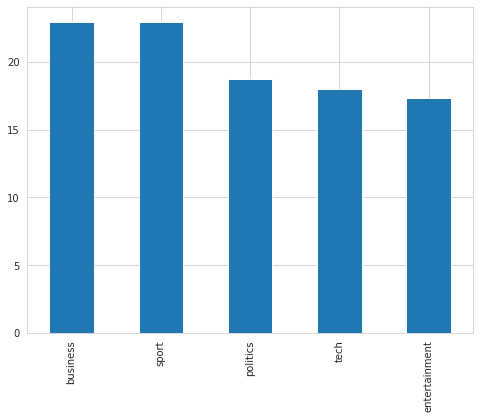

In [9]:
df_percentages.plot(kind='bar')

In [12]:
df['News_length'] = df['contents'].str.len()

In [13]:
df.head()

,Unnamed: 0,contents,category,News_length
0,0,Kilroy unveils immigration policy\n\nEx-chatsh...,politics,957
1,1,'Debate needed' on donations cap\n\nA cap on d...,politics,3001
2,2,Child access laws shake-up\n\nParents who refu...,politics,3536
3,3,"School sport 'is back', says PM\n\nTony Blair ...",politics,2410
4,4,Pre-poll clash on tax and spend\n\nLabour and ...,politics,2637


Text(0.5, 1.0, 'News length distribution')

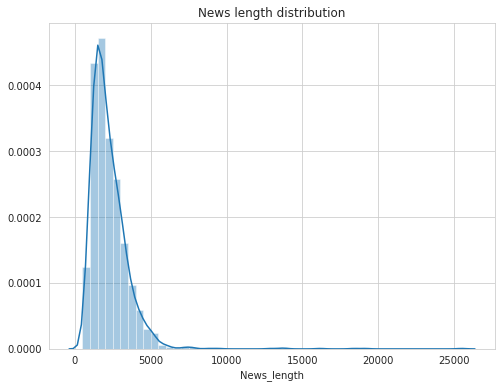

In [14]:
sb.distplot(df['News_length']).set_title('News length distribution')

In [15]:
df['News_length'].describe()

count     2224.000000
mean      2264.986061
std       1364.376735
min        503.000000
25%       1447.750000
50%       1966.000000
75%       2804.250000
max      25485.000000
Name: News_length, dtype: float64

In [16]:
quantile_95 = df['News_length'].quantile(0.95)

In [17]:
quantile_95

4289.099999999999

In [18]:
df_95 = df[df['News_length'] < quantile_95]

Text(0.5, 1.0, 'News length distribution')

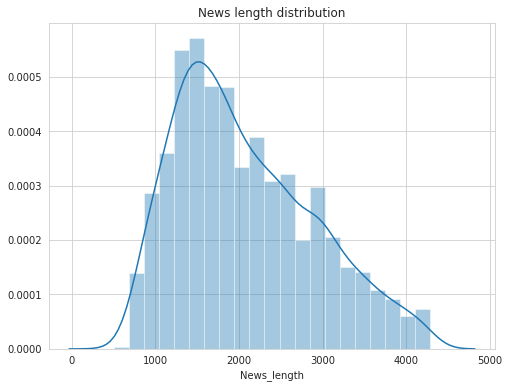

In [19]:
sb.distplot(df_95['News_length']).set_title('News length distribution')

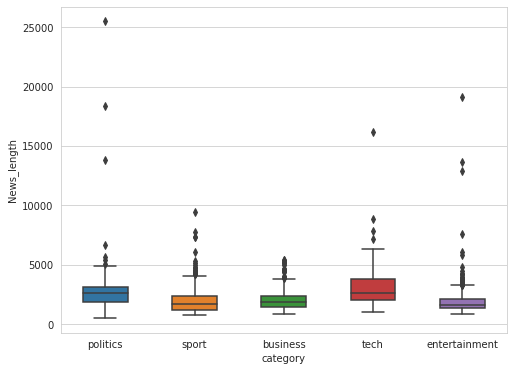

In [20]:
sb.boxplot(data=df, x='category', y='News_length', width=0.5)

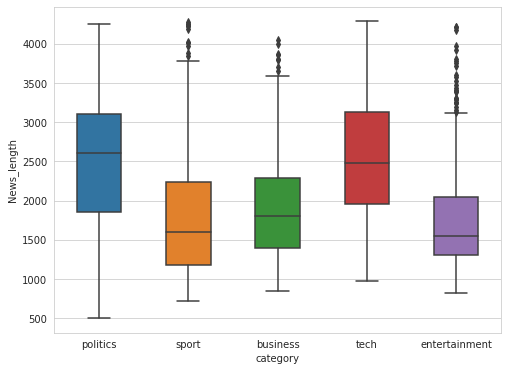

In [21]:
sb.boxplot(data=df_95, x='category', y='News_length', width=0.5)

In [22]:
pickle_file = 'pickles/dataset.pickle'
os.makedirs(os.path.dirname(pickle_file), exist_ok=True)

In [23]:
with open(pickle_file, 'wb') as output:
    pickle.dump(df, output)

In [24]:
df.describe()

,Unnamed: 0,News_length
count,2224.000000,2224.000000
mean,1111.500000,2264.986061
std,642.157821,1364.376735
min,0.000000,503.000000
25%,555.750000,1447.750000
50%,1111.500000,1966.000000
75%,1667.250000,2804.250000
max,2223.000000,25485.000000


In [25]:
df_95.describe()

,Unnamed: 0,News_length
count,2112.000000,2112.000000
mean,1102.436553,2072.465909
std,644.526249,825.273936
min,0.000000,503.000000
25%,549.750000,1417.000000
50%,1091.500000,1905.000000
75%,1659.250000,2625.250000
max,2223.000000,4284.000000
